In [1]:
%cd ..
from src.utils import *
from src.algos import *

/home/rafal/coding/coding/essa-tsp-metaheuristics


## Data Loading

In [2]:
distances = load_data('data/Dane_TSP_127.xlsx')

## Settings - One sample

In [3]:
POP_SIZE = 500
NO_GENERATIONS = 5
SELECTION_METHOD = "tournament" # truncation roulette tournament
CROSSOVER_METHOD = "pmx" # PMX OX
ELITE_SIZE = 0
MATING_POOL_SIZE = .5
MUTATION_RATE = .15
NEIGH_TYPE = "swap" # inversion insertion swap
VERBOSE = False

In [4]:
ga = GeneticAlgorithm(
    pop_size=POP_SIZE,
    no_generations=NO_GENERATIONS,
    selection_method=SELECTION_METHOD,
    crossover_method=CROSSOVER_METHOD,
    elite_size=ELITE_SIZE,
    mating_pool_size=MATING_POOL_SIZE,
    mutation_rate=MUTATION_RATE,
    neigh_type=NEIGH_TYPE,
    verbose=VERBOSE,
)
result = ga.solve(distances)
result

best distance: 478813.81556300714
algorithm: GENETIC ALGORITHM
Neighbourhood type: Swappop_size: 500
generations: 5
selection_method: tournament
crossover_method: PMX
elite_size: 0
mating_pool_size: 0.5
mutation_rate: 0.15

solving time: 9.154 s
history: [545420.0958518635, 513042.9634612691, 496589.5078379803, 484991.5513424878, 478813.81556300714]

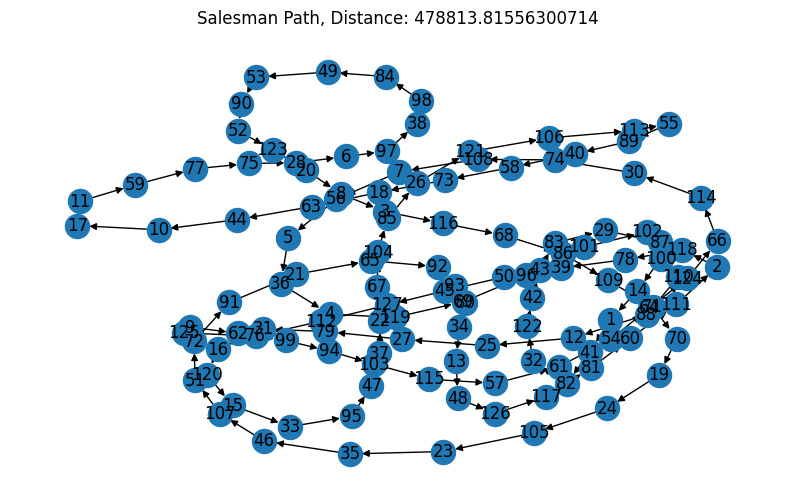

In [5]:
# Example of plotting the path
pp = PathPlotter()
pp.plot(result)

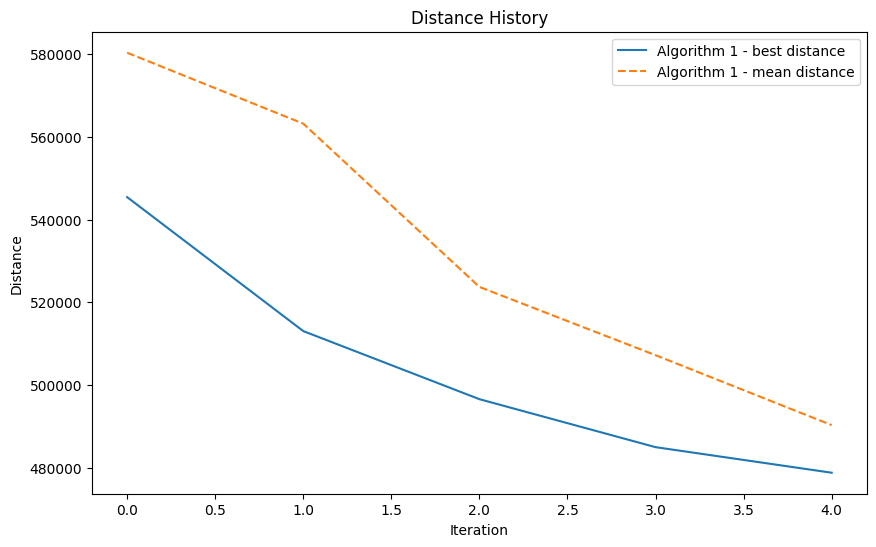

In [6]:
dhp = DistanceHistoryPlotter()
dhp.plot([result])

# Comparing multiple parameters

### STEP I - Make a list from the compared parameter

In [7]:
POP_SIZE = 50
NO_GENERATIONS = 10
SELECTION_METHOD = ["tournament", "truncation", "roulette"] # in this case, we will compare 3 different values of SELECTION_METHOD
CROSSOVER_METHOD = "pmx" # PMX OX
ELITE_SIZE = 0
MATING_POOL_SIZE = .5
MUTATION_RATE = .5
NEIGH_TYPE = "swap" # inversion insertion swap
VERBOSE = False

### STEP II - Run Models

In [8]:
results = []
for benchmarking_parameter in SELECTION_METHOD: #replace SELECTION_METHOD with any other parameter you want to compare
    ga = GeneticAlgorithm(
        pop_size=POP_SIZE,
        no_generations=NO_GENERATIONS,
        selection_method=benchmarking_parameter,  # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter
        crossover_method=CROSSOVER_METHOD,
        elite_size=ELITE_SIZE,
        mating_pool_size=MATING_POOL_SIZE,
        mutation_rate=MUTATION_RATE,
        neigh_type=NEIGH_TYPE,
        verbose=VERBOSE,
    )
    some_result = ga.solve(distances)
    results.append(some_result) # Results are stored in a list

STEP III - Plots

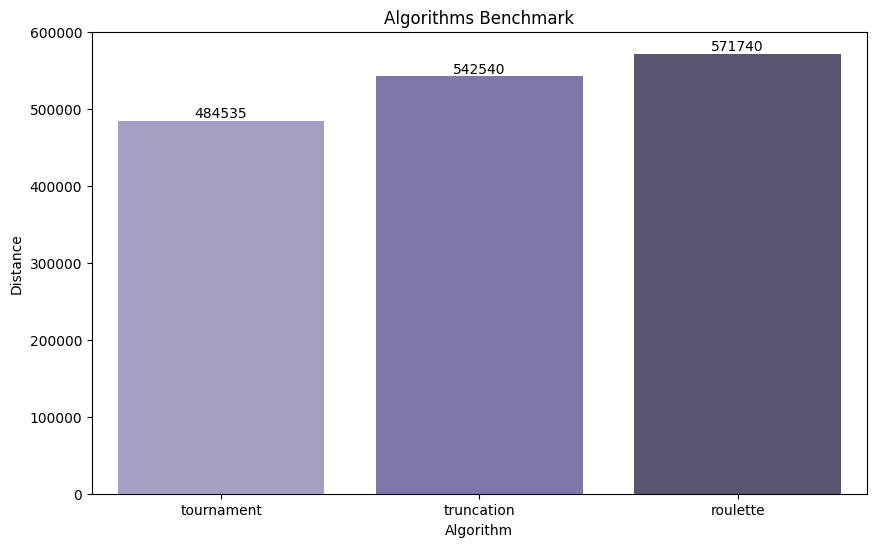

In [9]:
bp = BenchmarkPlotter()
bp.plot(results, labels=SELECTION_METHOD, palette="Purples_d") # I'am comparing different values of SELECTION_METHOD, but you can compare any other parameter

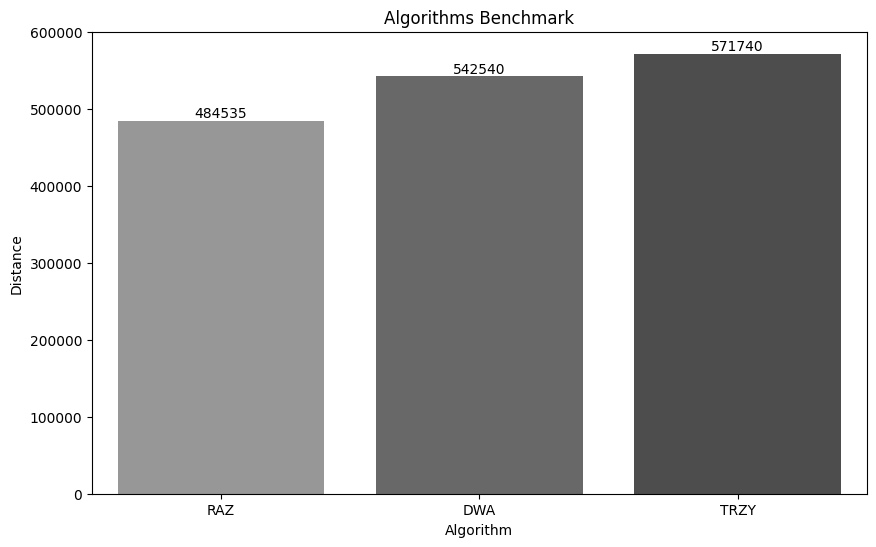

In [10]:
bp.plot(
        results, labels=["RAZ", "DWA", "TRZY"], palette="Greys_d"
    )  # Reds_d, Blues_d, Greens_d, Purples_d, Oranges_d, Greys_d

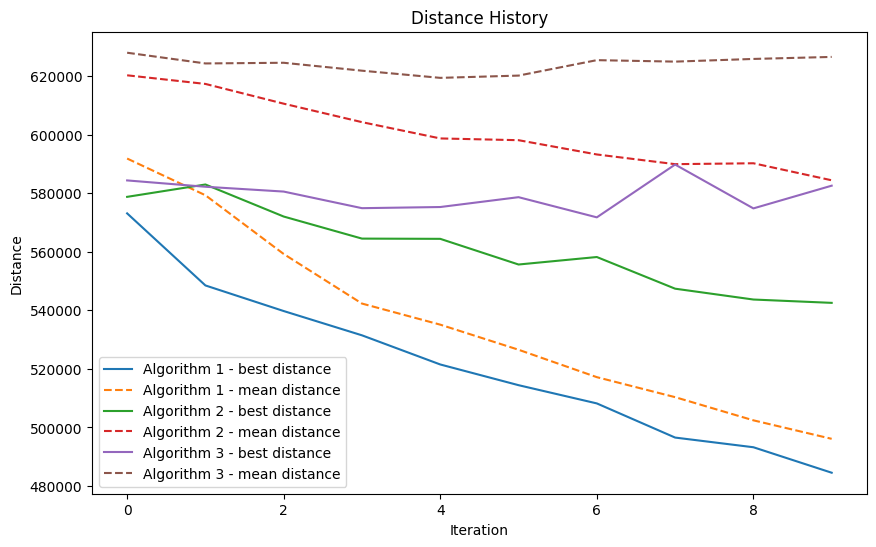

In [11]:
dhp = DistanceHistoryPlotter()
dhp.plot(results, )

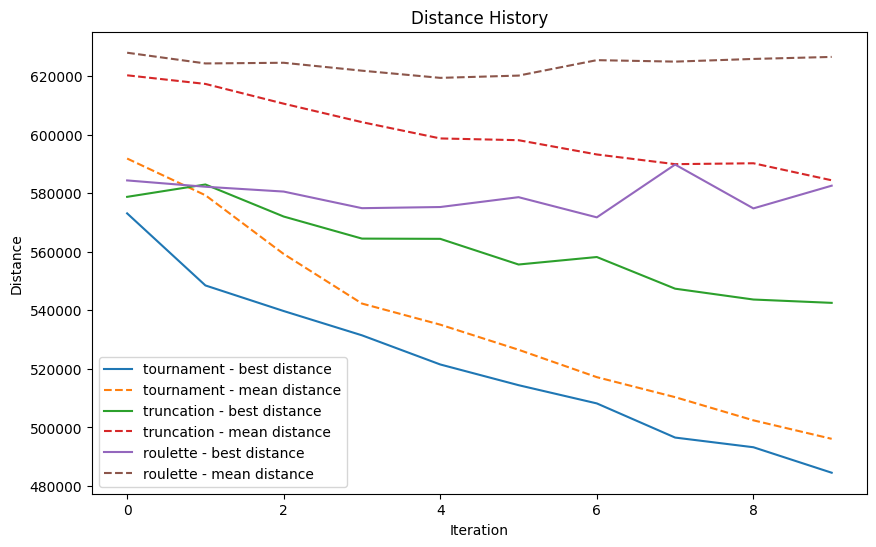

In [12]:
dhp = DistanceHistoryPlotter()
dhp.plot(results, labels=SELECTION_METHOD)

# Parallel approach

In [13]:
param_grid = {
    "POP_SIZE": [100, 200],
    "NO_GENERATIONS": [5],
    "SELECTION_METHOD": ["truncation"], # truncation roulette tournament
    "CROSSOVER_METHOD": ["pmx", "ox"],
    "ELITE_SIZE": [0],
    "MATING_POOL_SIZE": [.5],
    "MUTATION_RATE": [.5],
    "NEIGH_TYPE": ["swap", "inversion"], # inversion insertion swap
    "VERBOSE": [False]
}

In [14]:
gg = GridSearchGA(param_grid=param_grid, n_jobs=-1)
result = gg.solve(distances)

GridSearchgGA: 8 cobinations were composed


In [15]:
result

best distance: 530437.9431911604
algorithm: GENETIC ALGORITHM
Neighbourhood type: Inversionpop_size: 200
generations: 5
selection_method: truncation
crossover_method: OX
elite_size: 0
mating_pool_size: 0.5
mutation_rate: 0.5

solving time: 4.512 s
history: [563042.6235426666, 549443.351010433, 550893.642670793, 544552.0115813413, 530437.9431911604]